In [1]:
import os 
import pickle
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']
results_path = "../results"
models = ["gmm", "kmeans", "dbscan"]
model_names = ["GMM", "K-Means", "DBSCAN"]
back_part = "_ari_driven.pkl"

In [3]:
all_metrics = {}
for model in models:
    with open(os.path.join(results_path, model, model+back_part), 'rb') as file:
        output_metrics = pickle.load(file)
    all_metrics[model] = output_metrics

In [7]:
metric_data = {}
for trait in traits:
    ari = []
    for model in models:
        for ind_metric in all_metrics[model]:
            if ind_metric["trait"] == trait + "_bin":
                ari.append(ind_metric["ARI"])
    metric_data[trait] = ari
    

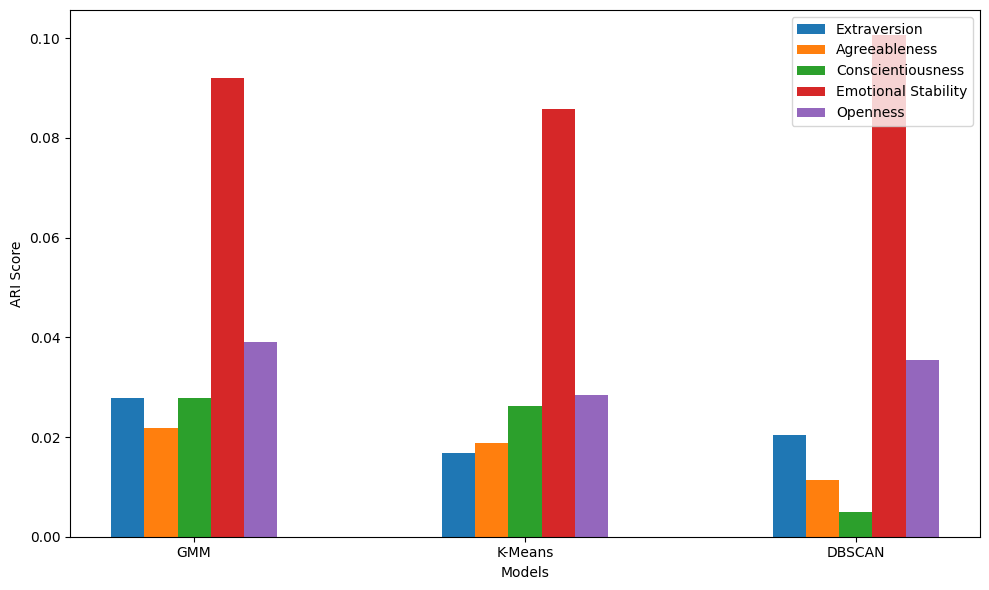

In [15]:
# Set the width of the bars
bar_width = 0.1

# Create an array for the x-axis positions
x = np.arange(len(models))

# Create a list of colors for bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, trait in enumerate(traits):
    ax.bar(x + i * bar_width, metric_data[trait], bar_width, label=trait)

# Set the labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('ARI Score')
ax.set_xticks(x + bar_width * (len(traits) - 1) / 2)
ax.set_xticklabels(model_names)
ax.legend(loc='best')


plt.tight_layout()
plt.savefig('figures/unsupervised_ari_plots.png')
plt.show()
